# Required Lib

In [ ]:
%%capture
!pip install transformers datasets
!pip install datasets soundfile speechbrain accelerate
!nvidia-smi
!pip install -U accelerate
!pip install -U transformers

HiggingFace login ต้องล็อกอินเสมอ ก่อนจะเทรนโมเดลบน 🤗

In [ ]:
from huggingface_hub import notebook_login

notebook_login() #เรียกใช้ login interface

# Load dataset
[common_voice_11_0](https://huggingface.co/datasets/mozilla-foundation/common_voice_11_0)  is a large-scale multilingual speech corpus in ASR task. Assume it can be use with TTS as well.

[common_voice](https://huggingface.co/datasets/common_voice/viewer/th) The Common Voice dataset consists of a unique MP3 and corresponding text file. Many of the 9,283 recorded hours in the dataset also include demographic metadata like age, sex, and accent that can help train the accuracy of speech recognition engines.

The dataset currently consists of 7,335 validated hours in 60 languages, but were always adding more voices and languages. Take a look at our Languages page to request a language or start contributing.

In [ ]:
from datasets import load_dataset, Audio

dataset = load_dataset("mozilla-foundation/common_voice_11_0", "th", split="validation[:50%]") # load dataset common_voice_11_0 ชุด validation เอาแค่ 50% แรก 5465 ไฟล์
len(dataset)

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 12820it [00:00, 128190.04it/s]
Reading metadata...: 31849it [00:00, 140780.67it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 10930it [00:00, 152432.41it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 10930it [00:00, 152651.17it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 3250it [00:00, 31839.23it/s]
Reading metadata...: 19046it [00:00, 105395.26it/s]
Reading metadata...: 35039it [00:00, 130161.10it/s]
Reading metadata...: 50243it [00:00, 138767.19it/s]
Reading metadata...: 64925it [00:00, 141661.64it/s]
Reading metadata...: 79459it [00:00, 142906.93it/s]
Reading metadata...: 93841it [00:00, 143202.32it/s]
Reading metadata...: 108767it [00:00, 145126.03it/s]
Reading metadata...: 123297it [00:00, 145176.11it/s]
Reading metadata...: 138626it [00:01, 147676.69it/s]
Reading metadata...: 153908it [00:01, 149247.54it/s]
Reading metadata...: 168835it [00:01, 148630.89it/s]
Reading metadata...: 195162it [00:01, 140014.19it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 8771it [00:00, 150132.18it/s]


5465

In [ ]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000)) #ต้องเปลี่ยน sampling_rate ให้เข้ากับโมเดล คือ 16000 kHz

In [ ]:
dataset[0] #ตัวอย่าง data ของไฟล์เสียงแรก

{'client_id': 'c4f727b35ed66f25c70efcc4ffeb2a41d9d11286f65e8f0a62eba0938542d146fb4254818c83d273615b4b5b75d0ab69de690b16bc142eb0d85f28f2c648969f',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/4971f905da9c8bc6d3f858c4defeda1b2fe3b515cc3a4358d33864e100ba8f02/th_dev_0/common_voice_th_25700675.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/4971f905da9c8bc6d3f858c4defeda1b2fe3b515cc3a4358d33864e100ba8f02/th_dev_0/common_voice_th_25700675.mp3',
  'array': array([ 7.77156117e-16, -6.66133815e-16, -1.33226763e-15, ...,
         -1.10937881e-05, -2.17357010e-05, -1.07006308e-05]),
  'sampling_rate': 16000},
 'sentence': 'มันกำลังถือกล่องเครื่องเพชรหนังสีเขียว',
 'up_votes': 2,
 'down_votes': 0,
 'age': '',
 'gender': '',
 'accent': '',
 'locale': 'th',
 'segment': ''}

In [ ]:
dataset[0]['audio']['array'] #ตัวอย่าง array ของเสียง

array([ 7.77156117e-16, -6.66133815e-16, -1.33226763e-15, ...,
       -1.10937881e-05, -2.17357010e-05, -1.07006308e-05])

In [ ]:
from IPython.display import Audio

#ตัวอย่างเสียง
Audio(dataset[0]['audio']['array'], rate=16000)

In [ ]:
# #รวม
# from datasets import load_dataset, Audio

# dataset = load_dataset("mozilla-foundation/common_voice_11_0", "th", split="validation[:50%]")
# dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))

# Model Processor

## [speecht5_tts](https://huggingface.co/docs/transformers/tasks/text-to-speech)

In [ ]:
from transformers import SpeechT5Processor

#โหลดโมเดล
checkpoint = "microsoft/speecht5_tts"
processor = SpeechT5Processor.from_pretrained(checkpoint)

(…)ts/resolve/main/preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

(…)5_tts/resolve/main/tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

(…)echt5_tts/resolve/main/added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

(…)tts/resolve/main/special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

# Preprocess the data

## Text cleanup for SpeechT5 tokenization

Because SpeechT5 was trained on the English language, it may not recognize certain characters in the Thai dataset.we need to add Thai characters in tokenizer.

In [ ]:
tokenizer = processor.tokenizer #ใช้ tokenizer class ของโมเดลที่ให้มา

In [ ]:
tokenizer.get_vocab().items() #ดู token ทั้งหมดของโมเดล จะเป็นได้ว่ายังไม่มีภาษาไทย

dict_items([('<s>', 0), ('<pad>', 1), ('</s>', 2), ('<unk>', 3), ('▁', 4), ('e', 5), ('t', 6), ('a', 7), ('o', 8), ('n', 9), ('i', 10), ('h', 11), ('s', 12), ('r', 13), ('d', 14), ('l', 15), ('u', 16), ('c', 17), ('m', 18), ('f', 19), ('w', 20), ('g', 21), ('y', 22), (',', 23), ('p', 24), ('b', 25), ('.', 26), ('v', 27), ('k', 28), ('"', 29), ('I', 30), ("'", 31), ('T', 32), ('A', 33), ('S', 34), ('H', 35), (';', 36), ('x', 37), ('W', 38), ('-', 39), ('B', 40), ('?', 41), ('C', 42), ('M', 43), ('!', 44), ('q', 45), ('j', 46), ('E', 47), ('N', 48), ('P', 49), ('O', 50), ('D', 51), ('L', 52), ('G', 53), ('R', 54), ('F', 55), ('Y', 56), ('z', 57), ('J', 58), (':', 59), ('K', 60), ('U', 61), ('V', 62), (')', 63), ('(', 64), ('Q', 65), ('Z', 66), (']', 67), ('[', 68), ('X', 69), ('—', 70), ('/', 71), ('æ', 72), ('é', 73), ('{', 74), ('}', 75), ('ê', 76), ('œ', 77), ('̄', 78), ('<mask>', 79), ('<ctc_blank>', 80)])

In [ ]:
import unicodedata

#ฟังก์ชันเพิ่มตัวอักษรภาษาไทยทั้งหมด
def get_thai_characters():
    thai_characters = set()
    for code_point in range(0x0E01, 0x0E5B):  # Thai script Unicode range
        character = chr(code_point)
        if 'THAI' in unicodedata.name(character, ''):
            thai_characters.add(character)
    return list(thai_characters)

thai_characters_set = get_thai_characters()
len(thai_characters_set)

86

In [ ]:
tokenizer.add_tokens(thai_characters_set) #เพิ่ม token ไทยทั้งหมด

86

In [ ]:
tokenizer.get_vocab().items() #token หลังจากเพิ่มภาาาไทยแล้ว

dict_items([('<s>', 0), ('<pad>', 1), ('</s>', 2), ('<unk>', 3), ('▁', 4), ('e', 5), ('t', 6), ('a', 7), ('o', 8), ('n', 9), ('i', 10), ('h', 11), ('s', 12), ('r', 13), ('d', 14), ('l', 15), ('u', 16), ('c', 17), ('m', 18), ('f', 19), ('w', 20), ('g', 21), ('y', 22), (',', 23), ('p', 24), ('b', 25), ('.', 26), ('v', 27), ('k', 28), ('"', 29), ('I', 30), ("'", 31), ('T', 32), ('A', 33), ('S', 34), ('H', 35), (';', 36), ('x', 37), ('W', 38), ('-', 39), ('B', 40), ('?', 41), ('C', 42), ('M', 43), ('!', 44), ('q', 45), ('j', 46), ('E', 47), ('N', 48), ('P', 49), ('O', 50), ('D', 51), ('L', 52), ('G', 53), ('R', 54), ('F', 55), ('Y', 56), ('z', 57), ('J', 58), (':', 59), ('K', 60), ('U', 61), ('V', 62), (')', 63), ('(', 64), ('Q', 65), ('Z', 66), (']', 67), ('[', 68), ('X', 69), ('—', 70), ('/', 71), ('æ', 72), ('é', 73), ('{', 74), ('}', 75), ('ê', 76), ('œ', 77), ('̄', 78), ('<mask>', 79), ('<ctc_blank>', 80), ('ไ', 81), ('จ', 82), ('๐', 83), ('ษ', 84), ('๑', 85), ('ข', 86), ('๓', 87), ('

In [ ]:
tokenizer('มันกำลังถือกล่องเครื่องเพชรหนังสีเขียว') #ตัวอย่างการ tokenization

{'input_ids': [150, 143, 112, 138, 162, 134, 143, 142, 148, 158, 151, 138, 134, 159, 151, 142, 124, 97, 165, 158, 159, 151, 142, 124, 102, 117, 165, 111, 112, 143, 142, 140, 89, 124, 86, 89, 114, 160, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
# #รวม
# tokenizer = processor.tokenizer

# import unicodedata

# #ฟังก์ชันเพิ่มตัวอักษรภาษาไทยทั้งหมด
# def get_thai_characters():
#     thai_characters = set()
#     for code_point in range(0x0E01, 0x0E5B):  # Thai script Unicode range
#         character = chr(code_point)
#         if 'THAI' in unicodedata.name(character, ''):
#             thai_characters.add(character)
#     return list(thai_characters)

# thai_characters_set = get_thai_characters()
# tokenizer.add_tokens(thai_characters_set)

## Speaker

นับจำนวนไฟล์เสียงที่อัดต่อคนพูด (ไม่ต้องทำก็ได้)

In [ ]:
from collections import defaultdict

speaker_counts = defaultdict(int) #กำหนด dict[int]

for speaker_id in dataset["client_id"]: #สร้าง dict ใช้นับแบบ id:จำนวนไฟล์เสียงรวมของคนๆนั้น
    speaker_counts[speaker_id] += 1

In [ ]:
max(speaker_counts.values()) #จำนวนไฟล์เสียงที่คนๆหนึ่งอัดได้เยอะสุด

20

In [ ]:
min(speaker_counts.values())#จำนวนไฟล์เสียงที่คนๆหนึ่งอัดได้น้อยสุด

1

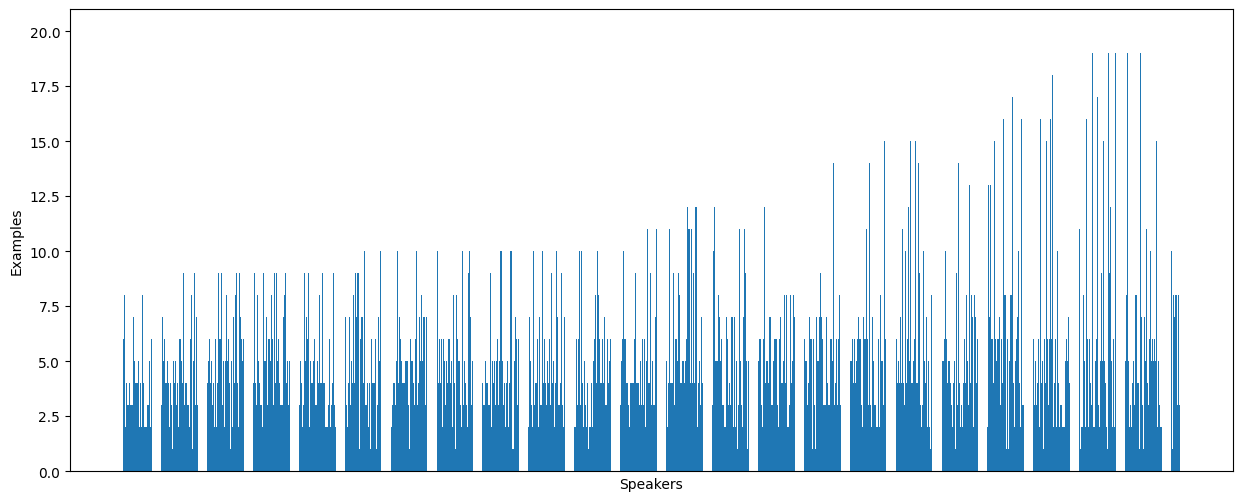

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.xticks([])
plt.bar(speaker_counts.keys(),speaker_counts.values())
plt.ylabel("Examples")
plt.xlabel("Speakers",)
plt.show()

In [ ]:
def select_speaker(speaker_id): #กรองเอาคนที่อัดไม่ถึง 5 ไฟล์ออก
    return 5 <= speaker_counts[speaker_id]


dataset_filtered_speaker = dataset.filter(select_speaker, input_columns=["client_id"])

Filter:   0%|          | 0/5465 [00:00<?, ? examples/s]

In [ ]:
len(set(dataset_filtered_speaker['client_id']))

535

In [ ]:
len(dataset_filtered_speaker) #ข้อมูลที่เหลือ

3951

In [ ]:
# from collections import defaultdict

# speaker_counts = defaultdict(int)

# for speaker_id in dataset["client_id"]:
#     speaker_counts[speaker_id] += 1

# def select_speaker(speaker_id):
#     return 5 <= speaker_counts[speaker_id]


# dataset_filtered_speaker = dataset.filter(select_speaker, input_columns=["client_id"])

## Speaker embeddings

[spkrec-xvect-voxceleb](https://huggingface.co/speechbrain/spkrec-xvect-voxceleb) ต้องหาคุณลักษณะของเสียงแต่ละคน จริงๆควรเทรนตัวนี้ด้วยถ้ามีเวลา

In [ ]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu" #ใช้ GPU
speaker_model = EncoderClassifier.from_hparams( #ใส่ param ของโมเดล
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name),
)


def create_speaker_embedding(waveform): #ฟังก์ชันคำนวนคุณลักษณะของเสียงพูดแต่ละคนด้วยโมเดลเสียงพูด
    with torch.no_grad(): #ไม่ต้องคำนวนเกรเดียน
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform)) #คำนวนคุณลักษณะของเสียงพูดแต่ละคน
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2) #norm และแปลง array
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy() #แปลงเป็น numpy
    return speaker_embeddings

(…)t-voxceleb/resolve/main/hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

(…)-voxceleb/resolve/main/label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [ ]:
# import os
# import torch
# from speechbrain.pretrained import EncoderClassifier

# spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

# device = "cuda" if torch.cuda.is_available() else "cpu"
# speaker_model = EncoderClassifier.from_hparams(
#     source=spk_model_name,
#     run_opts={"device": device},
#     savedir=os.path.join("/tmp", spk_model_name),
# )


# def create_speaker_embedding(waveform):
#     with torch.no_grad():
#         speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
#         speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
#         speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
#     return speaker_embeddings

## Voice preprocessing

In [ ]:
def prepare_dataset(example): #ฟังก์ชั่นเตรียมข้อมูล เราจะต้องเตรียมให้อยู่ในรูปของ 1.word embedding 2.speaker_embeddings 3.voice array
    audio = example["audio"] #ดึงข้อมูลของ audio

    example = processor( #เรียกใช้ processor มันจะคืนค่ากลับมาเป็น array ของ spectrogram เสียง
        text=example["sentence"], #ดึงข้อความของเสียงพูด
        audio_target=audio["array"],#ดึง array ของเสียงพูด
        sampling_rate=audio["sampling_rate"], #ดึง sampling_rate ของเสียงพูด
        return_attention_mask=False, #ไม่เอา return_attention_mask (ไม่ได้ใช้ tokenizer จะสามารถให้ mask ได้เผื่อต้องการทำ nlp)
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0] #array มี 3 มิติ ลดให้เหลือ 2

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"]) #คำนวน speaker_embedding

    return example

In [ ]:
processed_example = prepare_dataset(dataset[0]) #ตัวอย่างข้อมูลหลังจากแปลงแล้ว input_ids คือ token, labels คือ spectrogram, speaker_embeddings คือคุณลักษะณะเสียงพูด
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

test ทดสอบ ถ้าแปลงข้อมูลแล้ว แปลงกลับต้องได้เสียงอย่างเดิม

In [ ]:
example = dataset[0]
example

{'client_id': 'c4f727b35ed66f25c70efcc4ffeb2a41d9d11286f65e8f0a62eba0938542d146fb4254818c83d273615b4b5b75d0ab69de690b16bc142eb0d85f28f2c648969f',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/4971f905da9c8bc6d3f858c4defeda1b2fe3b515cc3a4358d33864e100ba8f02/th_dev_0/common_voice_th_25700675.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/4971f905da9c8bc6d3f858c4defeda1b2fe3b515cc3a4358d33864e100ba8f02/th_dev_0/common_voice_th_25700675.mp3',
  'array': array([ 7.77156117e-16, -6.66133815e-16, -1.33226763e-15, ...,
         -1.10937881e-05, -2.17357010e-05, -1.07006308e-05]),
  'sampling_rate': 16000},
 'sentence': 'มันกำลังถือกล่องเครื่องเพชรหนังสีเขียว',
 'up_votes': 2,
 'down_votes': 0,
 'age': '',
 'gender': '',
 'accent': '',
 'locale': 'th',
 'segment': ''}

In [ ]:
audio = example["audio"]
audio

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/4971f905da9c8bc6d3f858c4defeda1b2fe3b515cc3a4358d33864e100ba8f02/th_dev_0/common_voice_th_25700675.mp3',
 'array': array([ 7.77156117e-16, -6.66133815e-16, -1.33226763e-15, ...,
        -1.10937881e-05, -2.17357010e-05, -1.07006308e-05]),
 'sampling_rate': 16000}

In [ ]:
example = processor(
    text=example["sentence"],
    audio_target=audio["array"],
    sampling_rate=audio["sampling_rate"],
    return_attention_mask=False,
)

In [ ]:
example['labels'].shape

(1, 329, 80)

In [ ]:
processed_example['labels']

array([[-10.       , -10.       , -10.       , ..., -10.       ,
        -10.       , -10.       ],
       [-10.       , -10.       , -10.       , ..., -10.       ,
        -10.       , -10.       ],
       [ -8.502859 ,  -8.386776 ,  -8.657473 , ...,  -8.806028 ,
         -8.710562 ,  -8.774943 ],
       ...,
       [ -1.7260395,  -1.7179034,  -2.1655803, ...,  -4.0093055,
         -3.74035  ,  -3.672235 ],
       [ -1.9301856,  -1.8033558,  -2.0482957, ...,  -4.025683 ,
         -3.9310105,  -3.7724733],
       [ -2.769859 ,  -2.5477803,  -2.5482833, ...,  -4.433559 ,
         -4.4952316,  -4.429693 ]], dtype=float32)

use vocoder to decode spectrogram to voice. vocoder เป็นตัวแปลง spec กลับไปเป็นเสียง จริงๆก็ควรเทรนตัวนี้อีกตัว

In [ ]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

(…)peecht5_hifigan/resolve/main/config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [ ]:
spectrogram = torch.tensor(example['labels'][0])
with torch.no_grad():
    speech = vocoder(spectrogram)

In [ ]:
from IPython.display import Audio
Audio(speech.cpu().numpy(), rate=16000)

test end

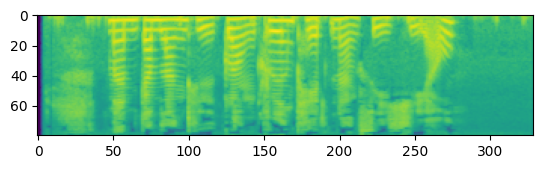

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

In [ ]:
dataset_mapped_preprocess = dataset_filtered_speaker.map(prepare_dataset, remove_columns=dataset_filtered_speaker.column_names) #แปลงข้อมูลโดยใช้ฟังก์ชั้นข้างบน

Map:   0%|          | 0/3951 [00:00<?, ? examples/s]

In [ ]:
def is_not_too_long(input_ids): #กรอง token ที่ยาวเกินไป (max=600 ตัวอักษร)
    input_length = len(input_ids)
    return input_length < 600


dataset_filtered_token = dataset_mapped_preprocess.filter(is_not_too_long, input_columns=["input_ids"])
len(dataset_filtered_token)

Filter:   0%|          | 0/3951 [00:00<?, ? examples/s]

3951

In [ ]:
dataset_train_test_splited = dataset_filtered_token.train_test_split(test_size=0.2) #แยก train test 80/20%

In [ ]:
dataset_train_test_splited

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 3160
    })
    test: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 791
    })
})

In [ ]:
# def prepare_dataset(example):
#     audio = example["audio"]

#     example = processor(
#         text=example["sentence"],
#         audio_target=audio["array"],
#         sampling_rate=audio["sampling_rate"],
#         return_attention_mask=False,
#     )

#     # strip off the batch dimension
#     example["labels"] = example["labels"][0]

#     # use SpeechBrain to obtain x-vector
#     example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

#     return example

# def is_not_too_long(input_ids):
#     input_length = len(input_ids)
#     return input_length < 600


# dataset_filtered_token = dataset_mapped_preprocess.filter(is_not_too_long, input_columns=["input_ids"])

# dataset_train_test_splited = dataset_filtered_token.train_test_split(test_size=0.2)

## Data collator

เราจะต้องทำ data collator เองเพื่อเตรียมข้อมูลให้อยู่ในรูปที่โมเดลใช้งานได้

In [ ]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union


@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(input_ids=input_ids, labels=label_features, return_tensors="pt")

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100)

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor([len(feature["input_values"]) for feature in label_features])
            target_lengths = target_lengths.new(
                [length - length % model.config.reduction_factor for length in target_lengths]
            )
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [ ]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

# Model training

เตรียมโมเดลจาก pre--train

In [ ]:
from transformers import SpeechT5ForTextToSpeech

model = SpeechT5ForTextToSpeech.from_pretrained(checkpoint)

(…)ft/speecht5_tts/resolve/main/config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [ ]:
model.config.use_cache = False #ไม่ต้องใช้แคช
model.resize_token_embeddings(len(tokenizer)) #ต้องปรับ token_embeddings ที่ decoder ให้ตรงตามจำนวน token ทั้งหมดที่เราเพิ่มไป

Embedding(167, 768)

In [ ]:
from transformers import Seq2SeqTrainingArguments

#เตรียม Arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="speecht5_finetuned_th_20k",  # change to a repo name of your choice
    per_device_train_batch_size=16,
    gradient_accumulation_steps=8,
    learning_rate=1e-4,
    warmup_steps=500,
    max_steps=8000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=16,
    save_steps=500,
    eval_steps=500,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)

In [ ]:
from transformers import Seq2SeqTrainer
#เตรียม trainer มันจะมี trainer เฉพาะของแต่ละโมเดล ถ้าตัวใหนไม่มีคือ fine-tune ไม่ได้
trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset_train_test_splited["train"],
    eval_dataset=dataset_train_test_splited["test"],
    data_collator=data_collator,
    tokenizer=processor,
)

In [ ]:
trainer.train() #train

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss,Validation Loss
500,0.574200,0.530509
1000,0.529200,0.523811
1500,0.506300,0.521722
2000,0.489900,0.522973
2500,0.480400,0.512684
3000,0.461600,0.517336
3500,0.453700,0.515180
4000,0.453700,0.517742
4500,0.443900,0.520078
5000,0.430400,0.514826


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.

TrainOutput(global_step=8000, training_loss=0.4712942569255829, metrics={'train_runtime': 22194.6858, 'train_samples_per_second': 46.137, 'train_steps_per_second': 0.36, 'total_flos': 6.183622752564787e+16, 'train_loss': 0.4712942569255829, 'epoch': 323.23})

## Push to hub

In [ ]:
trainer.push_to_hub() #เอาผลลัพท์การเทรนขึ้น huggingface

events.out.tfevents.1700131754.cc0b3c4d2df5.1519.0:   0%|          | 0.00/60.8k [00:00<?, ?B/s]

'https://huggingface.co/Jiranuwat/speecht5_finetuned_th_20k/tree/main/'

# Apply model/Inference

ทดลองใช้โมเดลที่เทรนมา

In [ ]:
from transformers import SpeechT5ForTextToSpeech
model = SpeechT5ForTextToSpeech.from_pretrained("Jiranuwat/speecht5_finetuned_th_20k")

In [ ]:
example = dataset_train_test_splited["train"][200]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)

In [ ]:
text = "มันกำลังถือกล่องเครื่องเพชรหนังสีเขียว"

In [ ]:
inputs = processor(text=text, return_tensors="pt")

In [ ]:
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)

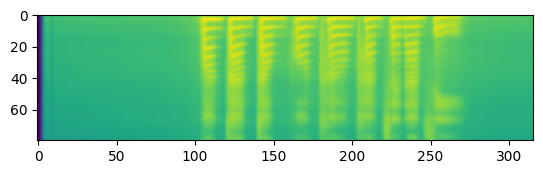

In [ ]:
plt.figure()
plt.imshow(spectrogram.T)
plt.show()

In [ ]:
from transformers import SpeechT5HifiGan

vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

In [ ]:
speech = model.generate_speech(torch.tensor([example["input_ids"]],dtype=torch.int64), speaker_embeddings, vocoder=vocoder)

In [ ]:
from IPython.display import Audio
Audio(speech.numpy(), rate=16000)